# CO AQI Forecasting using Machine Learning
This notebook builds a machine learning model to forecast CO AQI levels using available environmental data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import os  # Import the OS module

current_dir = os.getcwd()  # Get current directory
print("Current directory:", current_dir)

# Change to the desired working directory
os.chdir(r"C:\Users\tmqhu\Documents\March_Team_Project")  # Use raw string

# Confirm the change
current_dir = os.getcwd()
print("New working directory:", current_dir)


Current directory: c:\Users\tmqhu\Documents\March_Team_Project\ML_Models
New working directory: C:\Users\tmqhu\Documents\March_Team_Project


In [3]:
# Load dataset
file_path = 'Outputs/DashBoardData.zip'  # Update with the correct path
df = pd.read_csv(file_path, compression='zip', low_memory=False)
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,NO2 Mean,...,O3_AQI_Group,SO2_AQI_Range,SO2_AQI_Range_Description,SO2_AQI_Group,CO_AQI_Range,CO_AQI_Range_Description,CO_AQI_Group,NO2_AQI_Range,NO2_AQI_Range_Description,NO2_AQI_Group
0,22,33,9,1061-A Leesville Ave,Louisiana,East Baton Rouge,BATON ROUGE,2003-01-01,Parts per billion,14.652174,...,1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1
1,25,25,42,HARRISON AVE,Massachusetts,Suffolk,BOSTON,2003-01-01,Parts per billion,23.363636,...,1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1
2,34,7,3,COPEWOOD E. DAVIS STS; TRAILER,New Jersey,Camden,CAMDEN,2003-01-01,Parts per billion,32.750000,...,1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1
3,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,CONCORD,2003-01-01,Parts per billion,12.913043,...,1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1
4,48,113,69,1415 Hinton Street,Texas,Dallas,DALLAS,2003-01-01,Parts per billion,18.583333,...,1,Good,"Air quality is considered satisfactory, and ai...",1,Good,"Air quality is considered satisfactory, and ai...",1,Moderate,"Air quality is acceptable; however, for some p...",2


In [4]:
# Select relevant features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])  # Dropping unnecessary columns
X = df[numeric_columns]
y = df['CO AQI']  # Target variable


In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.762892155875462e-28
R² Score: 1.0


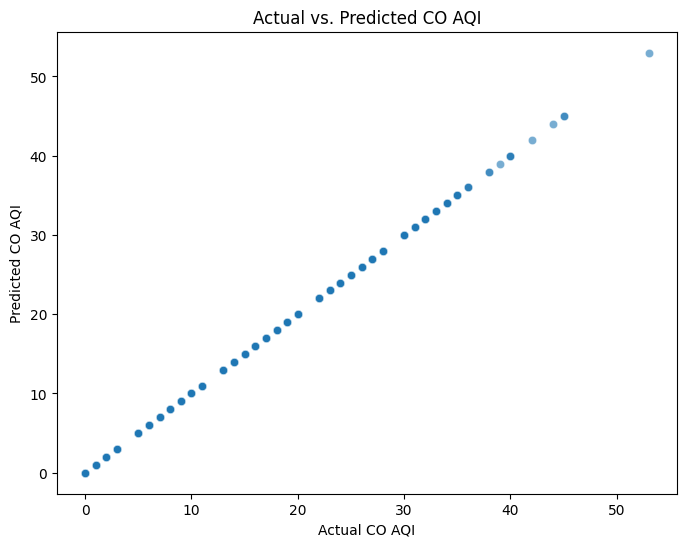

In [9]:
# Visualizing Predictions vs. Actual Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual CO AQI')
plt.ylabel('Predicted CO AQI')
plt.title('Actual vs. Predicted CO AQI')
plt.show()

In [10]:
# Save the model
import joblib
joblib.dump(model, 'CO_AQI_Model.pkl')
joblib.dump(scaler, 'Scaler.pkl')
print('Model and scaler saved.')

Model and scaler saved.
